# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data in dataframe and describing data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/xAPI-Edu-Data.csv - xAPI-Edu-Data.csv (1).csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,NaN,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,50.0,12.0,50,No,Bad,Above-7,M


In [5]:
df.shape

(480, 17)

In [6]:
df.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources            float64
AnnouncementsView           float64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,460.000000,476.000000,469.000000,480.000000
mean,46.708696,54.701681,37.897655,43.283333
std,30.919425,33.111157,26.673520,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# Finding missing values

In [ ]:
df.isnull().sum()

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                       10
Semester                     0
Relation                    15
raisedhands                 20
VisITedResources             4
AnnouncementsView           11
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     5
StudentAbsenceDays           5
Class                       13
dtype: int64

# Replacing Null Value in Topic with SimpleImputer

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
imp.fit(df[['Topic']])
df['Topic'] = imp.transform(df[['Topic']])
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,NaN,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


In [ ]:
df.isnull().sum()

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                        0
Semester                     0
Relation                    15
raisedhands                 20
VisITedResources             4
AnnouncementsView           11
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     5
StudentAbsenceDays           5
Class                       13
dtype: int64

# Filling Missing Values with constant value

In [ ]:
df['Relation'] = df['Relation'].fillna('Not Mentioned')

In [ ]:
df['AnnouncementsView'] = df['AnnouncementsView'].fillna(0)

# Filling Missing Values with mean for numerical data and mode for categorical data

In [ ]:
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace = True)

In [ ]:
df['VisITedResources'].fillna(df['VisITedResources'].mean(), inplace = True)

In [ ]:
Y = df['ParentschoolSatisfaction'].mode
Z = df['StudentAbsenceDays'].mode
W = df['Class'].mode

In [ ]:

df['ParentschoolSatisfaction'].fillna(Y, inplace = True)
df['StudentAbsenceDays'].fillna(Z, inplace= True)
df['Class'].fillna(W, inplace = True)


In [ ]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Outlier Detection

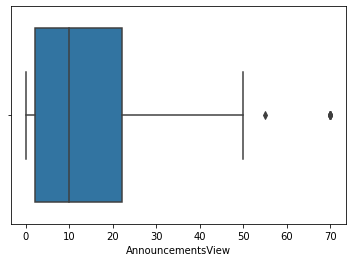

In [ ]:
sns.boxplot(data= df['AnnouncementsView'], x=df['AnnouncementsView'])

# Removing Outliers on AnnouncementsView Column using Z-score

In [ ]:
df['zscore'] = (df.AnnouncementsView - df.AnnouncementsView.mean())/ df.AnnouncementsView.std()
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,zscore
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.000000,16.000000,2.0,20,Yes,Good,Under-7,M,-1.298834
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.000000,20.000000,3.0,25,Yes,Good,Under-7,M,-1.261756
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.000000,7.000000,0.0,30,No,Bad,Above-7,L,-1.372992
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.000000,54.701681,5.0,35,No,Bad,Above-7,L,-1.187598
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,46.708696,50.000000,12.0,50,No,Bad,Above-7,M,-0.928048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.000000,4.000000,5.0,8,No,Bad,Above-7,L,-1.187598
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.000000,77.000000,14.0,28,No,Bad,Under-7,M,-0.853890
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.000000,74.000000,25.0,29,No,Bad,Under-7,M,-0.446025
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.000000,17.000000,14.0,57,No,Bad,Above-7,L,-0.853890


Removing values with zscore greater than 2- 7 outliers are removed

In [ ]:
df = df[df['zscore']<2]
df.shape

(473, 18)

# Transformations

In [ ]:
df['Relation'].unique()

array(['Father', 'Mum', 'Not Mentioned'], dtype=object)

In [9]:
df.PlaceofBirth.unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

In [ ]:
df.Relation.value_counts()

Father           274
Mum              184
Not Mentioned     15
Name: Relation, dtype: int64

**Transforming categorical data using Replacing**

In [ ]:
df.Relation.replace({'Father':0,'Mum':1,'Not Mentioned':-1},inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,zscore
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,15.000000,16.000000,2.0,20,Yes,Good,Under-7,M,-1.298834
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,20.000000,20.000000,3.0,25,Yes,Good,Under-7,M,-1.261756
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,10.000000,7.000000,0.0,30,No,Bad,Above-7,L,-1.372992
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,30.000000,54.701681,5.0,35,No,Bad,Above-7,L,-1.187598
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,46.708696,50.000000,12.0,50,No,Bad,Above-7,M,-0.928048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,0,5.000000,4.000000,5.0,8,No,Bad,Above-7,L,-1.187598
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,0,50.000000,77.000000,14.0,28,No,Bad,Under-7,M,-0.853890
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,0,55.000000,74.000000,25.0,29,No,Bad,Under-7,M,-0.446025
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,0,30.000000,17.000000,14.0,57,No,Bad,Above-7,L,-0.853890


In [ ]:
df.Relation.unique()
df.Relation.value_counts()

 0    274
 1    184
-1     15
Name: Relation, dtype: int64

In [ ]:
df.StageID.unique()
df.StageID.value_counts()

MiddleSchool    244
lowerlevel      198
HighSchool       31
Name: StageID, dtype: int64

# Label Encoder on StageID column

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['StageID'] = label_encoder.fit_transform(df['StageID'])
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,zscore
0,M,KW,KuwaIT,2,G-04,A,IT,F,0,15.000000,16.000000,2.0,20,Yes,Good,Under-7,M,-1.298834
1,M,KW,KuwaIT,2,G-04,A,IT,F,0,20.000000,20.000000,3.0,25,Yes,Good,Under-7,M,-1.261756
2,M,KW,KuwaIT,2,G-04,A,IT,F,0,10.000000,7.000000,0.0,30,No,Bad,Above-7,L,-1.372992
3,M,KW,KuwaIT,2,G-04,A,IT,F,0,30.000000,54.701681,5.0,35,No,Bad,Above-7,L,-1.187598
4,M,KW,KuwaIT,2,G-04,A,IT,F,0,46.708696,50.000000,12.0,50,No,Bad,Above-7,M,-0.928048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,1,G-08,A,Chemistry,S,0,5.000000,4.000000,5.0,8,No,Bad,Above-7,L,-1.187598
476,F,Jordan,Jordan,1,G-08,A,Geology,F,0,50.000000,77.000000,14.0,28,No,Bad,Under-7,M,-0.853890
477,F,Jordan,Jordan,1,G-08,A,Geology,S,0,55.000000,74.000000,25.0,29,No,Bad,Under-7,M,-0.446025
478,F,Jordan,Jordan,1,G-08,A,History,F,0,30.000000,17.000000,14.0,57,No,Bad,Above-7,L,-0.853890


# One Hot Encoding on Section and Semester columns

In [ ]:
df.SectionID.unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
df.Semester.unique()

array(['F', 'S'], dtype=object)

In [ ]:
data_one = pd.DataFrame()
data_one['SectionID'] = df['SectionID']
data_one['Semester'] = df['Semester']
data_one

,SectionID,Semester
0,A,F
1,A,F
2,A,F
3,A,F
4,A,F
...,...,...
475,A,S
476,A,F
477,A,S
478,A,F


In [ ]:
data_column = data_one.columns
data_column

Index(['SectionID', 'Semester'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse= False)
one_hot_encoded = one_hot_encoder.fit_transform(df[data_column])

ohe_frame = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(data_column))

ohe_frame.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,SectionID_A,SectionID_B,SectionID_C,Semester_F,Semester_S
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0
